## Data Cleaning (By State)

Data cleaning notebook for statewise dataset

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.getcwd()

'/home/rc/capstone/notebooks/data-cleaning'

In [ ]:
# Checking env/venv dependencies
%pip install seaborn
import seaborn as sns; print("seaborn", sns.__version__)

In [2]:
os.chdir('../../data')
!ls

Key_Indicator_State_and_District_wise_data  Key_indicator_statewise.csv
Key_Indicators_Statewise.sqlite		    healthanalytics.zip
Key_indicator_districtwise.csv		    statewise.sqlite


In [3]:
# Load statewise dataset
df = pd.read_csv('Key_indicator_statewise.csv')

# Remove all letter prefixes eg AA_ - ZZ_ from feature columns
df.columns = [re.sub(r'^[A-Z]{2}_', '', col) for col in df.columns]

# Check all features in resulting dataframe
df.head(10) # 9 states surveyed

State_Name  Sample_Units_Total  Sample_Units_Rural  Sample_Units_Urban  \
0           Assam                1784                1412                 372   
1           Bihar                2356                1981                 375   
2    Chhattisgarh                1255                 926                 329   
3       Jharkhand                2108                1513                 595   
4  Madhya Pradesh                2557                1660                 897   
5          Odisha                2364                1798                 566   
6       Rajasthan                1841                1294                 547   
7   Uttar Pradesh                3927                2782                1145   
8     Uttarakhand                2501                1962                 539   

   Households_Total  Households_Rural  Households_Urban  Population_Total  \
0            388853            319766             69087           1809610   
1            612684            568030             44654           3227867   
2            287085            226554             60531           1264309   
3            392734            318142             74592           2019298   
4            519811            357179            162632           2389787   
5            477065            392913             84152           1992799   
6            362671            300306             62365           1828116   
7            883613            710313            173300           4808503   
8            392643            308474             84169           1726477   

   Population_Rural  Population_Urban  ...  \
0           1518639            290971  ...   
1           2993906            233961  ...   
2            994416            269893  ...   
3           1644036            375262  ...   
4           1629355            760432  ...   
5           1637152            355647  ...   
6           1521017            307099  ...   
7           3883293            925210  ...   
8           1365247            361230  ...   

   Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit  \
0                                                76   
1                                                71   
2                                                63   
3                                                56   
4                                                91   
5                                                78   
6                                                79   
7                                                96   
8                                                50   

   Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit  \
0                                                79   
1                                                73   
2                                                67   
3                                                58   
4                                                94   
5                                                81   
6                                                82   
7                                                98   
8                                                53   

   Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit  \
0                                                33   
1                                                48   
2                                                37   
3                                                27   
4                                                55   
5                                                45   
6                                                48   
7                                                61   
8                                                34   

   Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit  \
0                                                40   
1                                                55   
2                                                43   
3                                                31   
4                                   

In [ ]:
# List of all feature columns
print(df.columns.tolist())

In [4]:
df.describe()

Sample_Units_Total  Sample_Units_Rural  Sample_Units_Urban  \
count            9.000000            9.000000            9.000000   
mean          2299.222222         1703.111111          596.111111   
std            738.802372          525.746004          266.659635   
min           1255.000000          926.000000          329.000000   
25%           1841.000000         1412.000000          375.000000   
50%           2356.000000         1660.000000          547.000000   
75%           2501.000000         1962.000000          595.000000   
max           3927.000000         2782.000000         1145.000000   

       Households_Total  Households_Rural  Households_Urban  Population_Total  \
count          9.000000          9.000000          9.000000      9.000000e+00   
mean      479684.333333     389075.222222      90609.111111      2.340752e+06   
std       179108.137044     152837.981905      45610.159061      1.071480e+06   
min       287085.000000     226554.000000      44654.000000      1.264309e+06   
25%       388853.000000     308474.000000      62365.000000      1.809610e+06   
50%       392734.000000     319766.000000      74592.000000      1.992799e+06   
75%       519811.000000     392913.000000      84169.000000      2.389787e+06   
max       883613.000000     710313.000000     173300.000000      4.808503e+06   

       Population_Rural  Population_Urban  \
count      9.000000e+00          9.000000   
mean       1.909673e+06     431078.333333   
std        9.173469e+05     241392.050217   
min        9.944160e+05     233961.000000   
25%        1.518639e+06     290971.000000   
50%        1.629355e+06     355647.000000   
75%        1.644036e+06     375262.000000   
max        3.883293e+06     925210.000000   

       Ever_Married_Women_Aged_15_49_Years_Total  ...  \
count                                   9.000000  ...   
mean                               442178.525556  ...   
std                                175654.782983  ...   
min                                251943.000000  ...   
25%                                349930.000000  ...   
50%                                385476.000000  ...   
75%                                471826.410000  ...   
max                                835022.320000  ...   

       Under_Five_Mortality_Rate_U5MR_Rural_Lower_Limit  \
count                                          9.000000   
mean                                          73.333333   
std                                           15.182226   
min                                           50.000000   
25%                                           63.000000   
50%                                           76.000000   
75%                                           79.000000   
max                                           96.000000   

       Under_Five_Mortality_Rate_U5MR_Rural_Upper_Limit  \
count                                          9.000000   
mean                                          76.111111   
std                                           15.086786   
min                                           53.000000   
25%                                           67.000000   
50%                                           79.000000   
75%                                           82.000000   
max                                           98.000000   

       Under_Five_Mortality_Rate_U5MR_Urban_Lower_Limit  \
count                                          9.000000   
mean                                          43.111111   
std                                           11.151731   
min                                           27.000000   
25%                                           34.000000   
50%                                           45.000000   
75%                                           48.000000   
max                                           61.000000   

       Under_Five_Mortality_Rate_U5MR_Urban_Upper_Limit  \
count                                          9.000000   
mean                 

In [5]:
df.shape

(9, 643)

In [6]:
states = list(df.State_Name.unique())
print(len(states))
states

9


['Assam',
 'Bihar',
 'Chhattisgarh',
 'Jharkhand',
 'Madhya Pradesh',
 'Odisha',
 'Rajasthan',
 'Uttar Pradesh',
 'Uttarakhand']

In [7]:
# Check for null values
# --- Null count per feature (overall) ---
null_counts = df.isnull().sum()

print("Null counts per feature:")
print(null_counts[null_counts > 0].sum()) 

Null counts per feature:
0


In [8]:
nulls_long = (
    df.drop(columns=["State_Name"])
      .isnull()
      .groupby(df["State_Name"])
      .sum()
      .reset_index()
      .melt(id_vars="State_Name", var_name="Feature", value_name="Null_Count")
)

print(nulls_long.head(20)) # First 20 of 640+ features

        State_Name             Feature  Null_Count
0            Assam  Sample_Units_Total           0
1            Bihar  Sample_Units_Total           0
2     Chhattisgarh  Sample_Units_Total           0
3        Jharkhand  Sample_Units_Total           0
4   Madhya Pradesh  Sample_Units_Total           0
5           Odisha  Sample_Units_Total           0
6        Rajasthan  Sample_Units_Total           0
7    Uttar Pradesh  Sample_Units_Total           0
8      Uttarakhand  Sample_Units_Total           0
9            Assam  Sample_Units_Rural           0
10           Bihar  Sample_Units_Rural           0
11    Chhattisgarh  Sample_Units_Rural           0
12       Jharkhand  Sample_Units_Rural           0
13  Madhya Pradesh  Sample_Units_Rural           0
14          Odisha  Sample_Units_Rural           0
15       Rajasthan  Sample_Units_Rural           0
16   Uttar Pradesh  Sample_Units_Rural           0
17     Uttarakhand  Sample_Units_Rural           0
18           Assam  Sample_Unit

In [9]:
print(nulls_long.tail(20)) # Last 20 of 640+ features

          State_Name                               Feature  Null_Count
5758   Uttar Pradesh  Sex_Ratio_At_Birth_Rural_Upper_Limit           0
5759     Uttarakhand  Sex_Ratio_At_Birth_Rural_Upper_Limit           0
5760           Assam  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5761           Bihar  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5762    Chhattisgarh  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5763       Jharkhand  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5764  Madhya Pradesh  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5765          Odisha  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5766       Rajasthan  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5767   Uttar Pradesh  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5768     Uttarakhand  Sex_Ratio_At_Birth_Urban_Lower_Limit           0
5769           Assam  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
5770           Bihar  Sex_Ratio_At_Birth_Urban_Upper_Limit           0
5771  

In [10]:
# Auto-populate list of all features
features_df = pd.DataFrame({"Feature": df.columns})
print(features_df.head(20))

                                           Feature
0                                       State_Name
1                               Sample_Units_Total
2                               Sample_Units_Rural
3                               Sample_Units_Urban
4                                 Households_Total
5                                 Households_Rural
6                                 Households_Urban
7                                 Population_Total
8                                 Population_Rural
9                                 Population_Urban
10       Ever_Married_Women_Aged_15_49_Years_Total
11       Ever_Married_Women_Aged_15_49_Years_Rural
12       Ever_Married_Women_Aged_15_49_Years_Urban
13  Currently_Married_Women_Aged_15_49_Years_Total
14  Currently_Married_Women_Aged_15_49_Years_Rural
15  Currently_Married_Women_Aged_15_49_Years_Urban
16                     Children_12_23_Months_Total
17                     Children_12_23_Months_Rural
18                     Children

In [11]:
 ## Range of the target variable
print(df.Infant_Mortality_Rate_Imr_Total_Person.min())
print(df.Infant_Mortality_Rate_Imr_Total_Person.max())

36.0
68.03


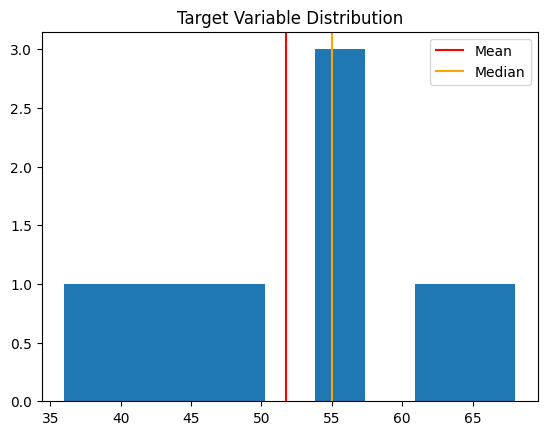

In [12]:
## Target Variable Distribution
plt.hist(df.Infant_Mortality_Rate_Imr_Total_Person, bins=9)
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.mean(), color='red', label='Mean')
plt.axvline(df.Infant_Mortality_Rate_Imr_Total_Person.median(), color='orange', label = 'Median')
plt.title('Target Variable Distribution'), plt.legend()
plt.show()

In [13]:
## Correlation overview
df.select_dtypes(include='number').corr()

Sample_Units_Total  Sample_Units_Rural  \
Sample_Units_Total                              1.000000            0.966899   
Sample_Units_Rural                              0.966899            1.000000   
Sample_Units_Urban                              0.864244            0.707273   
Households_Total                                0.921807            0.914290   
Households_Rural                                0.850719            0.892080   
...                                                  ...                 ...   
Sex_Ratio_At_Birth_Total_Upper_Limit           -0.368794           -0.356487   
Sex_Ratio_At_Birth_Rural_Lower_Limit           -0.158196           -0.173195   
Sex_Ratio_At_Birth_Rural_Upper_Limit           -0.300060           -0.314751   
Sex_Ratio_At_Birth_Urban_Lower_Limit           -0.418535           -0.367069   
Sex_Ratio_At_Birth_Urban_Upper_Limit           -0.557475           -0.462935   

                                      Sample_Units_Urban  Households_Total  \
Sample_Units_Total                              0.864244          0.921807   
Sample_Units_Rural                              0.707273          0.914290   
Sample_Units_Urban                              1.000000          0.751328   
Households_Total                                0.751328          1.000000   
Households_Rural                                0.598161          0.974608   
...                                                  ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit           -0.318924         -0.108278   
Sex_Ratio_At_Birth_Rural_Lower_Limit           -0.096824          0.087031   
Sex_Ratio_At_Birth_Rural_Upper_Limit           -0.210777         -0.082804   
Sex_Ratio_At_Birth_Urban_Lower_Limit           -0.435872         -0.125959   
Sex_Ratio_At_Birth_Urban_Upper_Limit           -0.631808         -0.283446   

                                      Households_Rural  Households_Urban  \
Sample_Units_Total                            0.850719          0.769148   
Sample_Units_Rural                            0.892080          0.601029   
Sample_Units_Urban                            0.598161          0.945999   
Households_Total                              0.974608          0.661058   
Households_Rural                              1.000000          0.476260   
...                                                ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit         -0.065275         -0.206467   
Sex_Ratio_At_Birth_Rural_Lower_Limit          0.105523         -0.011838   
Sex_Ratio_At_Birth_Rural_Upper_Limit         -0.068140         -0.096834   
Sex_Ratio_At_Birth_Urban_Lower_Limit         -0.053175         -0.316446   
Sex_Ratio_At_Birth_Urban_Upper_Limit         -0.176674         -0.521047   

                                      Population_Total  Population_Rural  \
Sample_Units_Total                            0.888621          0.822681   
Sample_Units_Rural                            0.882429          0.858010   
Sample_Units_Urban                            0.722202          0.587652   
Households_Total                              0.986546          0.957544   
Households_Rural                              0.975623          0.988728   
...                                                ...               ...   
Sex_Ratio_At_Birth_Total_Upper_Limit         -0.064482         -0.028732   
Sex_Ratio_At_Birth_Rural_Lower_Limit          0.139011          0.152322   
Sex_Ratio_At_Birth_Rural_Upper_Limit         -0.036182         -0.024609   
Sex_Ratio_At_Birth_Urban_Lower_Limit         -0.110983         -0.047633   
Sex_Ratio_At_Birth_Urban_Upper_Limit         -0.264695         -0.171563   

                                      Population_Urban  \
Sample_Units_Total                            0.817989   
Sample_Units_Rural                            0.656243   
Sample_Units_Urban                            0.972456   
Households_Total                              0.740140   
Households_Rural        

In [ ]:
# Ordered correlation with target var
target_corr = dict(df.select_dtypes(include='number').corr()['Infant_Mortality_Rate_Imr_Total_Person'])
sorted(target_corr.items(), key = lambda item: item[1])

In [ ]:
# Columns representing totals
col_totals=[]
for c in df.columns:
    if 'Total' in c:
        col_totals.append(c)
col_totals

In [15]:
def nullcount(df):
    nullcounts={}
    for col in df:
        nullcounts[col] = df[col].isnull().sum()
    return nullcounts

In [16]:
## Null values for each feature with nulls
null_counts = nullcount(df)
has_null = dict()
for k,v in null_counts.items():
    if v>0:
        has_null[k]=v
sorted(has_null.items(), key = lambda item: item[1])

[]

In [17]:
## Number of features with nulls
len(has_null)

0

### Correlation to Target Variable

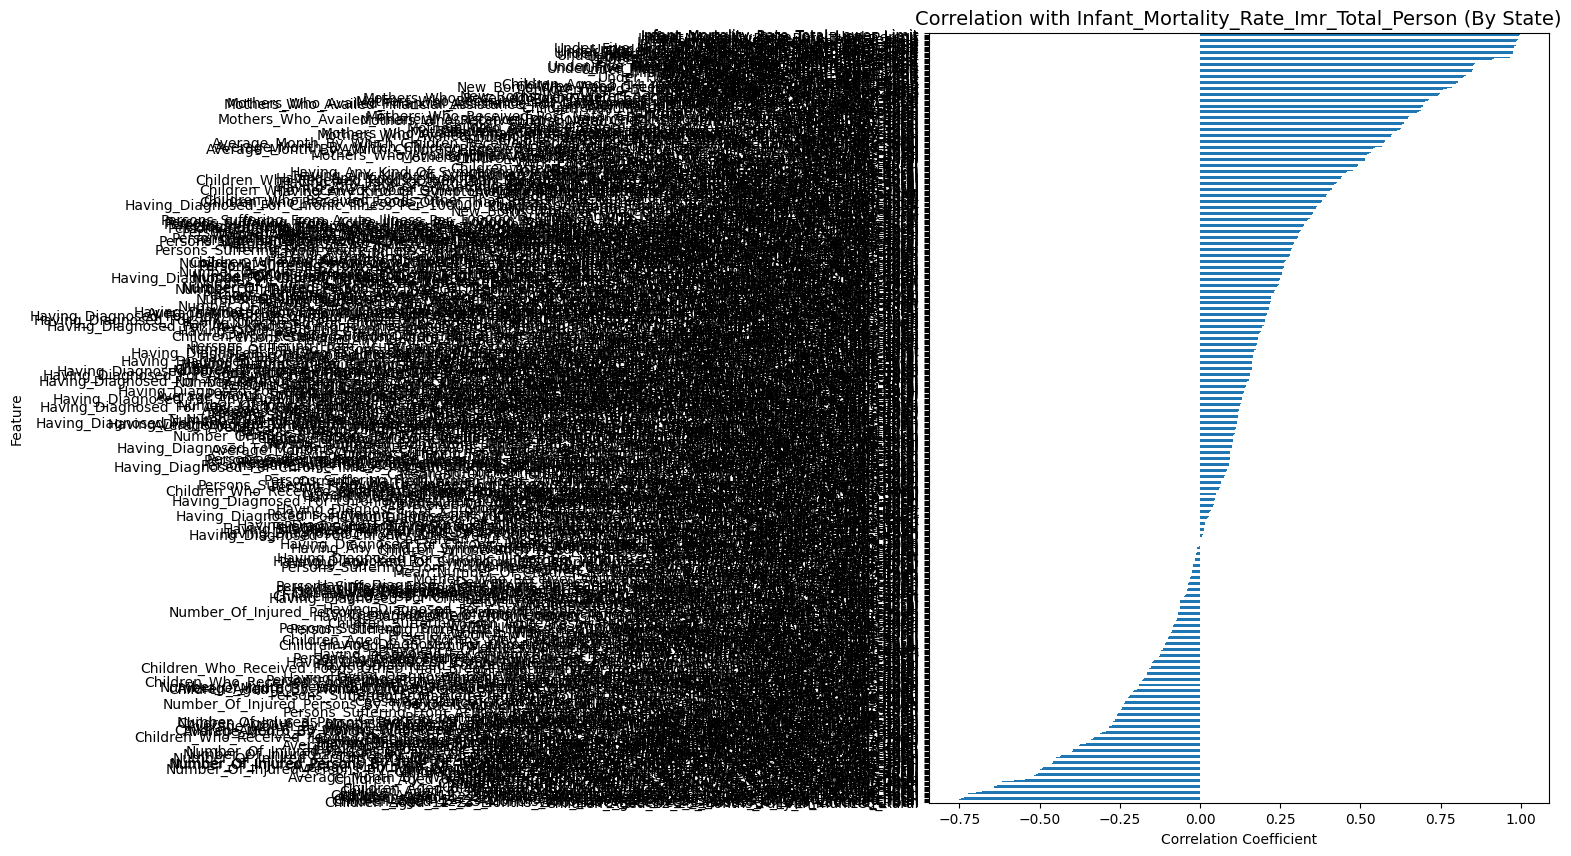

In [18]:
import matplotlib.pyplot as plt

# Get correlations with target
target = 'Infant_Mortality_Rate_Imr_Total_Person'
corr = (
    df.select_dtypes(include='number')
      .corr()[target]
      .drop(target)  # drop self-correlation
      .sort_values()
)

# Plot
plt.figure(figsize=(8, 10))
corr.plot(kind='barh')
plt.title(f'Correlation with {target} (By State)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

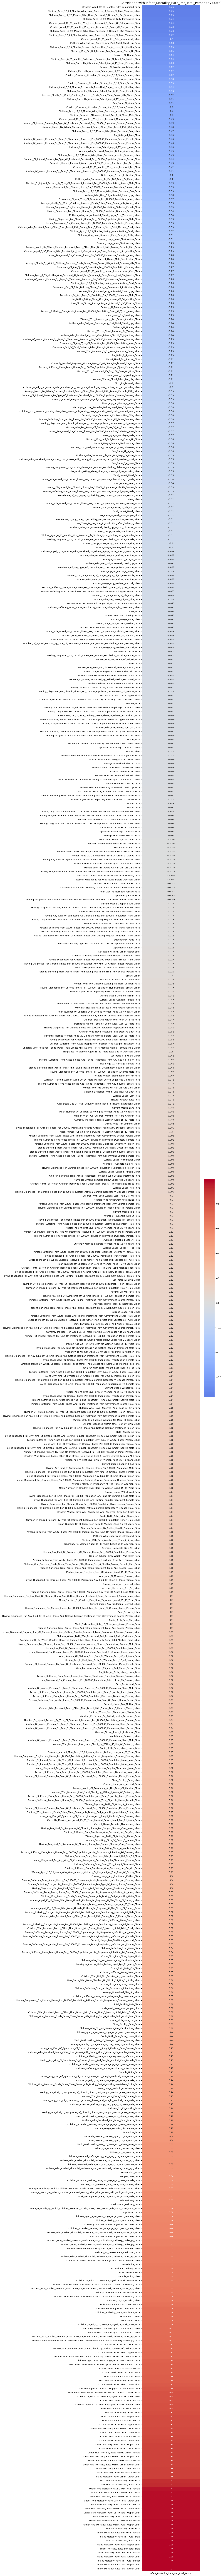

In [19]:
import seaborn as sns

plt.figure(figsize=(6, len(corr)/3))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation with {target} (By State)', fontsize=14)
plt.show()